# TESTS MODELES AUTOCOHERENTS 

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as nppol
from classes import * 

    
class Autocoherent_IIa:
    
    
    def __init__(self):
        """
        Définition des hypothèses du modèle.
        """
        self.type_inclusion = 0 # Sphères
        self.behavior_condition = set(['K', 'G','E', 'nu'])  # Le modèle s'applique sur des microstructures dont les inclusions et la matrice sont isotropes
        self.n_inclusions = 1 # Nombre d'inclusions de natures différentes 
        self.name = "Autocohérent"
        self.precision = 10**-6
        
    def __str__(self):
        """
        Description textuelle du modèle.
        """
        return "Modèle autocohérent"
    
    def __repr__(self):
        """
        Description textuelle du modèle.
        """
        return str(self)
    
    def check_hypothesis(self, microstructure):
        """
        Vérifies si la microstructure vérifie les hypothèses du modèle, renvoie un boolées. 
        TODO : Éventuellement généraliser cette fonction en l'incorporant dans une classe mère Model pour qu'elle s'applique à tous les modèles.
        """
        dict_inclusions = microstructure.dict_inclusions
        inclusions = dict_inclusions.keys()
        n_inclusions = len(inclusions)
        # vérification du nombre d'inclusions
        if n_inclusions != self.n_inclusions:
            # Le modèle ne peut pas traiter de microstructures avec autant d'inclusions de natures différentes
             #raise NameError("Wrong number of inclusion")
             return False
        for inclusion in dict_inclusions.keys():
            # Vérification du type d'inclusion
            if inclusion.type_inclusion != self.type_inclusion:
                #raise NameError("Wrong type of inclusion or microstructure")
                return False
            # vérification du comportement des inclusions
            behavior = inclusion.behavior
            if set(behavior.keys()) != self.behavior_condition:
                #raise NameError("Inclusion and microstructure behavior incompatible")
                return False
        # Vérification su comportement de la matrice
        if set(microstructure.matrix_behavior.keys()) != self.behavior_condition:
            raise NameError("Inclusion and microstructure behavior incompatible")
            return False
        # À ce stade, toutes les conditions ont été vérifiées
        return True
    
    
    def Reccurence(Module,f):
        K,G,Km,Gm,Kf,Gf=Module    
        ##Calcul de deux constantes utiles
        alpha = K/(K+4*G/3)
        beta = (3-alpha)/5
        ##Calcul de Kn+1
        knumerator = (K-Kf)*(K-Km)*alpha
        kdenominator = f*(K-Kf)+(1-f)*(K-Km)
        nextK = knumerator/kdenominator
        ##Calcul de Gn+1
        gnumerator = (G-Gf)*(G-Gm)*beta
        gdenominator = (f*(G-Gf)+(1-f)*(G-Gm))
        nextG = gnumerator/gdenominator
        return nextK,nextG
  
    def compute_h_behavior(self,microstructure):
        """
        Calcule le comportement homogénéisé équivalent de la microstructure. Renvoie un dict avec les paramètres calculés. Pour le moment, ne calcul que le module de cisaillement.
        TODO : compléter avec le calcul complet (K et G)
        """           
        
        compatible = self.check_hypothesis(microstructure)
        if not compatible:
            raise NameError("The microstructure does not match the model hypothesis")
        Cm = microstructure.matrix_behavior
        dict_inclusions = microstructure.dict_inclusions
        inclusion = list(dict_inclusions.keys())[0] #Inclusion unique ici
        Cf = inclusion.behavior
        
        Gm, Km = Cm['G'], Cm['K']
        Gf, Kf = Cf['G'], Cf['K']
        f = dict_inclusions[inclusion]
        
        # calcul par reccurence des modules
        K = f*Kf+(1-f)*Km
        G = f*Gf+(1-f)*Gm
        precision = self.precision
        nextK,nextG=Autocoherent_IIa.Reccurence([K,G,Km,Gm,Kf,Gf],f)
        #while nextK-K > precision or nextG-G > precision : 
        for i in range(100) :
            K,G=nextK,nextG
            nextK,NextG=Autocoherent_IIa.Reccurence([K,G,Km,Gm,Kf,Gf],f)  
        return complete_behavior({'K' : nextK, 'G' : nextG})
    
    
    
    def check_bounds(self,microstructure):
        Behavior_h=self.compute_h_behavior(microstructure)
        Gh = Behavior_h['G']
        Kh = Behavior_h['K']
        Bounds=microstructure.Hashin_bounds()
        Gsup = Bounds['Gsup']
        Ginf = Bounds['Ginf']
        Ksup = Bounds['Ksup']
        Kinf = Bounds['Kinf']
        if Gh < Ginf or Gh > Gsup : 
            raise NameError("G out of Hashin-Shtrikman bounds")
            return False
        if Kh < Kinf or Kh > Ksup :
            raise NameError("K out of Hashin-Shtrikman bounds")
            return False
        return True
   

    
class Autocoherent_IIb:
    
    
    def __init__(self):
        """
        Définition des hypothèses du modèle.
        """
        self.type_inclusion = 0 # Sphères
        self.behavior_condition = set(['K', 'G','E', 'nu'])  # Le modèle s'applique sur des microstructures dont les inclusions et la matrice sont isotropes
        self.n_inclusions = 1 # Nombre d'inclusions de natures différentes 
        self.name = "Autocohérent"
        self.precision = 10**-6
        
    def __str__(self):
        """
        Description textuelle du modèle.
        """
        return "Modèle autocohérent"
    
    def __repr__(self):
        """
        Description textuelle du modèle.
        """
        return str(self)
    
    def check_hypothesis(self, microstructure):
        """
        Vérifies si la microstructure vérifie les hypothèses du modèle, renvoie un boolées. 
        TODO : Éventuellement généraliser cette fonction en l'incorporant dans une classe mère Model pour qu'elle s'applique à tous les modèles.
        """
        dict_inclusions = microstructure.dict_inclusions
        inclusions = dict_inclusions.keys()
        n_inclusions = len(inclusions)
        # vérification du nombre d'inclusions
        if n_inclusions != self.n_inclusions:
            # Le modèle ne peut pas traiter de microstructures avec autant d'inclusions de natures différentes
             #raise NameError("Wrong number of inclusion")
             return False
        for inclusion in dict_inclusions.keys():
            # Vérification du type d'inclusion
            if inclusion.type_inclusion != self.type_inclusion:
                #raise NameError("Wrong type of inclusion or microstructure")
                return False
            # vérification du comportement des inclusions
            behavior = inclusion.behavior
            if set(behavior.keys()) != self.behavior_condition:
                #raise NameError("Inclusion and microstructure behavior incompatible")
                return False
        # Vérification su comportement de la matrice
        if set(microstructure.matrix_behavior.keys()) != self.behavior_condition:
            raise NameError("Inclusion and microstructure behavior incompatible")
            return False
        # À ce stade, toutes les conditions ont été vérifiées
        return True
    
    def Reccurence(Module,f):
        K,G,Km,Gm,Kf,Gf=Module
        ##Calcul de Kn+1
        numerator = f*(Kf-Km)*(3*K+4*G)
        denominator = 3*Kf+4*G
        nextK = Km + numerator/denominator
        ##Calcul de Gn+1
        numerator = 5*f*G*(Gf-Gm)*(3*K+4*G)
        denominator = 3*K*(3*G+2*Gf)+4*G*(3*Gf+2*G)        
        nextG = Gm + numerator/denominator
        return nextK,nextG
    
  
    def compute_h_behavior(self,microstructure):
        """
        Calcule le comportement homogénéisé équivalent de la microstructure. Renvoie un dict avec les paramètres calculés. Pour le moment, ne calcul que le module de cisaillement.
        TODO : compléter avec le calcul complet (K et G)
        """           
        
        compatible = self.check_hypothesis(microstructure)
        if not compatible:
            raise NameError("The microstructure does not match the model hypothesis")
        Cm = microstructure.matrix_behavior
        dict_inclusions = microstructure.dict_inclusions
        inclusion = list(dict_inclusions.keys())[0] #Inclusion unique ici
        Cf = inclusion.behavior
        
        Gm, Km = Cm['G'], Cm['K']
        Gf, Kf = Cf['G'], Cf['K']
        f = dict_inclusions[inclusion]
        
        # calcul par reccurence des modules
        K = f*Kf+(1-f)*Km
        G = f*Gf+(1-f)*Gm
        precision = self.precision
        nextK,nextG=Autocoherent_IIb.Reccurence([K,G,Km,Gm,Kf,Gf],f)
        #while nextK-K > precision or nextG-G > precision : 
        for i in range(100) :
            K,G=nextK,nextG
            nextK,NextG=Autocoherent_IIb.Reccurence([K,G,Km,Gm,Kf,Gf],f)            
        return complete_behavior({'K' : nextK, 'G' : nextG})
    
    
    def check_bounds(self,microstructure):
        Behavior_h=self.compute_h_behavior(microstructure)
        Gh = Behavior_h['G']
        Kh = Behavior_h['K']
        Bounds=microstructure.Hashin_bounds()
        Gsup = Bounds['Gsup']
        Ginf = Bounds['Ginf']
        Ksup = Bounds['Ksup']
        Kinf = Bounds['Kinf']
        if Gh < Ginf or Gh > Gsup : 
            raise NameError("G out of Hashin-Shtrikman bounds")
            return False
        if Kh < Kinf or Kh > Ksup :
            raise NameError("K out of Hashin-Shtrikman bounds")
            return False
        return True
             
class Autocoherent_IIc:
    
    def __init__(self):
        """
        Définition des hypothèses du modèle.
        """
        self.type_inclusion = 0 # Sphères
        self.behavior_condition = set(['K', 'G','E', 'nu'])  # Le modèle s'applique sur des microstructures dont les inclusions et la matrice sont isotropes
        self.n_inclusions = 1 # Nombre d'inclusions de natures différentes 
        self.name = "Autocohérent"
        
    def __str__(self):
        """
        Description textuelle du modèle.
        """
        return "Modèle autocohérent"
    
    def __repr__(self):
        """
        Description textuelle du modèle.
        """
        return str(self)
    
    def check_hypothesis(self, microstructure):
        """
        Vérifies si la microstructure vérifie les hypothèses du modèle, renvoie un boolées. 
        TODO : Éventuellement généraliser cette fonction en l'incorporant dans une classe mère Model pour qu'elle s'applique à tous les modèles.
        """
        dict_inclusions = microstructure.dict_inclusions
        inclusions = dict_inclusions.keys()
        n_inclusions = len(inclusions)
        # vérification du nombre d'inclusions
        if n_inclusions != self.n_inclusions:
            # Le modèle ne peut pas traiter de microstructures avec autant d'inclusions de natures différentes
             #raise NameError("Wrong number of inclusion")
             return False
        for inclusion in dict_inclusions.keys():
            # Vérification du type d'inclusion
            if inclusion.type_inclusion != self.type_inclusion:
                #raise NameError("Wrong type of inclusion or microstructure")
                return False
            # vérification du comportement des inclusions
            behavior = inclusion.behavior
            if set(behavior.keys()) != self.behavior_condition:
                #raise NameError("Inclusion and microstructure behavior incompatible")
                return False
        # Vérification su comportement de la matrice
        if set(microstructure.matrix_behavior.keys()) != self.behavior_condition:
            raise NameError("Inclusion and microstructure behavior incompatible")
            return False
        # À ce stade, toutes les conditions ont été vérifiées
        return True
    
    def compute_g(k1,k2,u1,u2,c,microstructure) :
        c1=c
        c2=1-c
        E = 2*16/9
        D = c1*k1*4/3 + c2*k2*4/3 + 5*c1*u2*16/9 + 5*c2*u1*16/9 + 2*(4/3*(k1+k2)-16/9*(u1+u2))
        C = c1*k1*(k2-4/3*(u1+u2)) + c2*k2*(k1-4/3*(u1+u2)) + 5*c1*u2*4/3*(k1+k2-4/3*u1) + 5*c2*u1*4/3*(k1+k2-4/3*u2) + 2*(k1*k2+16/9*u1*u2-4/3*(u1*k1+u1*k2+u2*k1+u2*k2))
        B = c1*k1*(4/3*u1*u2-k2*(u1+u2)) + c2*k2*(4/3*u1*u2-k1*(u1+u2)) + 5*c1*u2*(k1*k2-4/3*u1*(k1+k2)) + 5*c2*u1*(k1*k2-4/3*u2*(k1+k2)) + 2*(4/3*u1*u2*(k1+k2)-k1*k2*(u1+u2))
        A = -2*k1*k2*u1*u2
        Sol = nppol.polyroots([A,B,C,D,E])
        up = microstructure.Hashin_bounds()['Gsup']
        um = microstructure.Hashin_bounds()['Ginf']
        print(Sol,um,up)
        precision = 10**6
        for x in Sol:
            print(x, x>=um , x<=up)
            if (x>=um-precision and x<=up+precision) : 
                return x
        raise NameError("no roots fonund")
            
    
    def compute_k(u,k1,k2,c) : 
        c1=c
        c2=1-c
        X = (k1+4/3*u)*(k2+4/3*u)
        Y = c1*(k2+4/3*u)+c2*(k1+4/3*u)
        k = X/Y-4/3*u
        return k
    
  
    def compute_h_behavior(self,microstructure):
        """
        Calcule le comportement homogénéisé équivalent de la microstructure. Renvoie un dict avec les paramètres calculés. Pour le moment, ne calcul que le module de cisaillement.
        TODO : compléter avec le calcul complet (K et G)
        """           
        
        compatible = self.check_hypothesis(microstructure)
        if not compatible:
            raise NameError("The microstructure does not match the model hypothesis")
        Cm = microstructure.matrix_behavior
        dict_inclusions = microstructure.dict_inclusions
        inclusion = list(dict_inclusions.keys())[0] #Inclusion unique ici
        Cf = inclusion.behavior
        
        Gm, Km = Cm['G'], Cm['K']
        Gf, Kf = Cf['G'], Cf['K']
        f = dict_inclusions[inclusion]
        
        Gh = Autocoherent_IIc.compute_g(Kf,Km,Gf,Gm,f,microstructure)
        Kh = Autocoherent_IIc.compute_k(Gh,Kf,Km,f)
                
        return complete_behavior({'K' : Kh, 'G' : Gh})
    
    
    def check_bounds(self,microstructure):
        Behavior_h=self.compute_h_behavior(microstructure)
        Gh = Behavior_h['G']
        Kh = Behavior_h['K']
        Bounds=microstructure.Hashin_bounds()
        Gsup = Bounds['Gsup']
        Ginf = Bounds['Ginf']
        Ksup = Bounds['Ksup']
        Kinf = Bounds['Kinf']
        if Gh < Ginf or Gh > Gsup : 
            raise NameError("G out of Hashin-Shtrikman bounds")
            return False
        if Kh < Kinf or Kh > Ksup :
            raise NameError("K out of Hashin-Shtrikman bounds")
            return False
        return True           
               

    

def bulk_to_young(K, G):
    """
    Transforme des modules K et G en modules E et nu.
    """
    E = 9*K*G/(3*K+G)
    nu = (3*K-2*G)/(2*(3*K+G))
    return E, nu
   
def young_to_bulk(E, nu):
    """
    Transforme des modules E et nu en modules K et G
    """
    K = E/(3*(1-2*nu))
    G = E/(2*(1+nu))
    return K, G
    
def complete_behavior(behavior):
    """
    Si le comportement en entrée est isotrope, le complète avec E et nu ou K et G. Sinon, le renvoie tel quel.
    """
    parameters = list(behavior.keys())
    result = behavior
    if parameters[:2] == ['K', 'G']:
        K, G = behavior['K'], behavior['G']
        if (K==0 and G==0) : 
            E, nu = 0, 0.3
        else : 
            E, nu = bulk_to_young(K, G)
        result['E'], result['nu'] = E, nu
    elif parameters[:2] == ['E', 'nu']:
        E, nu = behavior['E'], behavior['nu']
        if nu >= 0.5 : 
            nu = 0.4999999999
        K, G = young_to_bulk(E, nu)
        result['K'], result['G'] = K, G
    return result
    
    



In [26]:
Gm=1;
Km=2

Gv=10
nuv=0.3
Kv=2*Gv*(1+nuv)/(3*(1-2*nuv))

Gf=10
nuf=0.3
Kf=2*Gf*(1+nuf)/(3*(1-2*nuf))

f = 0.2
cf = 0.1

inclusion_behavior = {"K":Kf, "G":Gf}
interphase_behavior = {"K":Kv, "G":Gv}         
matrix_behavior = {"K":Km, "G":Gm} 

inclusion1 = Inclusion(0,inclusion_behavior)
microstructure1 = Microstructure(matrix_behavior,{inclusion1 : f})

Ch1=Autocoherent_IIa().compute_h_behavior(microstructure1)
Ch2=Autocoherent_IIb().compute_h_behavior(microstructure1)
Ch3=Autocoherent_IIc().compute_h_behavior(microstructure1)

Ch4=Autocoherent_III().compute_h_behavior(microstructure1)

inclusion2 = Inclusion(0,interphase_behavior)
microstructure2 = Microstructure(matrix_behavior,{inclusion1 : f, inclusion2 : cf})
Ch5=Autocoherent_IV().compute_h_behavior(microstructure2)

print(Ch1)
print(Ch2)
print(Ch3)
print(Ch4)
print(Ch5)

[-21.45939475  -8.59456725  -0.89601836   1.47498035] 1.4039497307001794 2.125000000000001
-21.459394745085035 False True
{'K': -3.954696039037327e+18, 'G': 2.785498111044094e+16, 'E': 8.376160217465947e+16, 'nu': 0.503530048047007}
{'K': 2.861269399381656, 'G': 1.8081925152614349, 'E': 4.480709200578309, 'nu': 0.23900225301244338}
{'K': 11.621663752852655, 'G': -21.459394745085035, 'E': -167.43341695747628, 'nu': 2.901168205031144}
{'K': 2.687645687645688, 'G': 1.4151103171796298, 'E': 3.6114860899941337, 'nu': 0.27604401089802205}
{'K': 3.1500974658869394, 'G': 1.7039320923670735, 'E': 4.330912430449008, 'nu': 0.27085828415631796}


<ipython-input-25-dd9ee6ea6cdf>:71: RuntimeWarning: invalid value encountered in double_scalars
  nextK = knumerator/kdenominator
<ipython-input-25-dd9ee6ea6cdf>:75: RuntimeWarning: invalid value encountered in double_scalars
  nextG = gnumerator/gdenominator
/app/classes.py:836: RuntimeWarning: invalid value encountered in double_scalars
  M1[0,2]=(5*(1-nuv))**(-1)*(-12*alpha1/Rf**5)
/app/classes.py:837: RuntimeWarning: invalid value encountered in double_scalars
  M1[0,3]=(5*(1-nuv))**(-1)*4*(f1-27*alpha1)/(15*(1-2*nuf)*Rf**3)
/app/classes.py:840: RuntimeWarning: invalid value encountered in double_scalars
  M1[1,2]=(5*(1-nuv))**(-1)*(-20*(1-2*nuv)*alpha1)/(7*Rf**7)
/app/classes.py:841: RuntimeWarning: invalid value encountered in double_scalars
  M1[1,3]=(5*(1-nuv))**(-1)*(-12*alpha1*(1-2*nuv))/(7*(1-2*nuf)*Rf**5)
/app/classes.py:854: RuntimeWarning: divide by zero encountered in double_scalars
  M2[0,2]=(5*(1-num))**(-1)*(-12*alpha2/Rv**5)
/app/classes.py:855: RuntimeWarning: divid

[-16.33153132 -16.25        -0.91846868   1.        ] 1.0 1.0
-16.331531320900663 False True
[-17.66267059 -14.78438646  -0.91751662   1.01735145] 1.0172294968986906 1.052173913043477
-17.662670590220316 False True
[-18.19250732 -14.12063319  -0.91654792   1.03524399] 1.0347463516330786 1.104803493449781
-18.192507318656165 False True
[-18.58451274 -13.59529194  -0.91556218   1.0537002 ] 1.0525578135949545 1.1578947368421062
-18.584512739238935 False True
[-18.90536399 -13.14170964  -0.91455899   1.07274374] 1.0706713780918728 1.211453744493392
-18.905363994926496 False True
[-19.18087548 -12.73409713  -0.91353792   1.09239942] 1.0890947968638631 1.2654867256637168
-19.18087548385138 False True
[-19.42427744 -12.35925058  -0.91249853   1.11269322] 1.1078360891445003 1.3200000000000003
-19.424277439228508 False True
[-19.6434232  -12.00934433  -0.91144037   1.13365235] 1.1269035532994924 1.375
-19.64342320232631 False True
[-19.84342544 -11.67929468  -0.91036298   1.15530532] 1.14630577

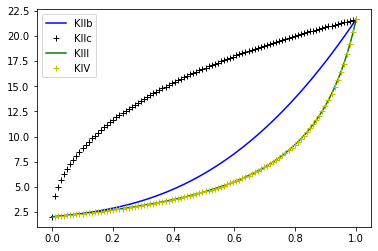

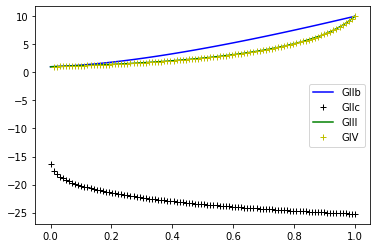

In [27]:
Gm=1;
Km=2

Gv=10
nuv=0.3
Kv=2*Gv*(1+nuv)/(3*(1-2*nuv))

Gf=10
nuf=0.3
Kf=2*Gf*(1+nuf)/(3*(1-2*nuf))

R1=1
K1,G1,K2,K3,G2,G3,K4,G4,K5,G5 = [],[],[],[],[],[],[],[],[],[]
F=np.linspace(0,1,100)
cf=0
#F=[0,1]
for i in range(len(F)):
    f_inclusion = F[i]
    inclusion_behavior = {"K":Kf, "G":Gf}
    interphase_behavior = {"K":Kv, "G":Gv}         
    matrix_behavior = {"K":Km, "G":Gm} 

    
    inclusion1 = Inclusion(0,inclusion_behavior)
    microstructure1 = Microstructure(matrix_behavior,{inclusion1 : f_inclusion})

    Ch1=Autocoherent_IIa().compute_h_behavior(microstructure1)
    Ch2=Autocoherent_IIb().compute_h_behavior(microstructure1)
    Ch3=Autocoherent_IIc().compute_h_behavior(microstructure1)
    Ch4=Autocoherent_III().compute_h_behavior(microstructure1)

    inclusion2 = Inclusion(0,interphase_behavior)
    microstructure2 = Microstructure(matrix_behavior,{inclusion1 : f_inclusion, inclusion2 : cf})
    Ch5=Autocoherent_IV().compute_h_behavior(microstructure2)
    
    K1.append(Ch1['K'])
    G1.append(Ch1['G'])
    K2.append(Ch2['K'])
    G2.append(Ch2['G'])
    K3.append(Ch3['K'])
    G3.append(Ch3['G'])
    K4.append(Ch4['K'])
    G4.append(Ch4['G'])
    K5.append(Ch5['K'])
    G5.append(Ch5['G'])
    
    
#plt.plot(F,K1,'-r',label="KIIa")
plt.plot(F,K2,'-b',label="KIIb")
plt.plot(F,K3,'+k',label="KIIc")
plt.plot(F,K4,'-g',label="KIII")
plt.plot(F,K5,'+y',label="KIV")
plt.legend()
plt.show()

#plt.plot(F,G1,'-r',label="GIIa")
plt.plot(F,G2,'-b',label="GIIb")
plt.plot(F,G3,'+k',label="GIIc")
plt.plot(F,G4,'-g',label="GIII")
plt.plot(F,G5,'+y',label="GIV")
plt.legend()
plt.show()

# MODELE AUTOCOHERENT

### Test pour un composite particulier

Référence :  [V. Marcadon , E. Herve, A. Zaoui,  2007. Micromechanical modeling of packing and size effects in particulate composites].

Fig 3 p7

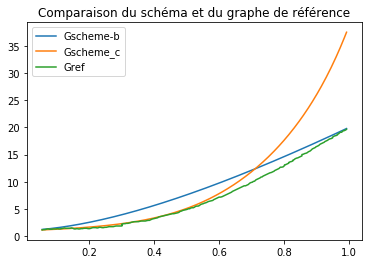

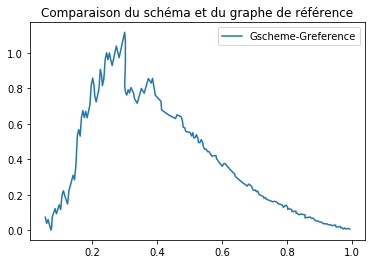

In [5]:
Fref =  [0.0557, 0.06, 0.0643, 0.0686, 0.0728, 0.075, 0.0771, 0.0814, 0.0857, 0.09, 0.0943, 0.0986, 0.1028, 0.1071, 0.1114, 0.1157, 0.12, 0.1243, 0.1285, 0.1328, 0.1371, 0.1414, 0.1457, 0.15, 0.1543, 0.1585, 0.1628, 0.1671, 0.1714, 0.1757, 0.18, 0.1843, 0.1885, 0.1928, 0.1971, 0.2014, 0.2057, 0.2078, 0.2121, 0.2164, 0.2207, 0.225, 0.2292, 0.2314, 0.2357, 0.24, 0.2442, 0.2485, 0.2528, 0.257, 0.2614, 0.2657, 0.27, 0.2742, 0.2785, 0.2828, 0.2871, 0.2913, 0.2957, 0.2999, 0.3021, 0.3021, 0.2999, 0.3021, 0.3064, 0.3107, 0.3149, 0.3192, 0.3235, 0.3277, 0.3299, 0.3342, 0.3385, 0.3428, 0.3471, 0.3514, 0.3557, 0.3599, 0.3642, 0.3685, 0.3728, 0.3771, 0.3814, 0.3856, 0.3899, 0.3942, 0.3985, 0.4028, 0.4071, 0.4114, 0.4135, 0.4178, 0.4221, 0.4264, 0.4306, 0.4349, 0.4392, 0.4435, 0.4478, 0.4521, 0.4563, 0.4606, 0.4649, 0.4692, 0.4735, 0.4778, 0.4799, 0.4842, 0.4885, 0.4928, 0.4971, 0.5013, 0.5056, 0.5099, 0.5121, 0.5163, 0.5206, 0.5249, 0.527, 0.5312, 0.5356, 0.5399, 0.542, 0.5463, 0.5506, 0.5549, 0.5592, 0.5635, 0.5678, 0.572, 0.5763, 0.5806, 0.5828, 0.587, 0.5913, 0.5956, 0.5998, 0.6042, 0.6085, 0.6127, 0.617, 0.6213, 0.6256, 0.6299, 0.6341, 0.6385, 0.6406, 0.6449, 0.647, 0.6492, 0.6535, 0.6577, 0.662, 0.6663, 0.6684, 0.6726, 0.677, 0.6813, 0.6856, 0.6899, 0.692, 0.6942, 0.6963, 0.6984, 0.7027, 0.7048, 0.7092, 0.7113, 0.7134, 0.7177, 0.722, 0.7263, 0.7284, 0.7327, 0.7349, 0.7391, 0.7433, 0.7477, 0.752, 0.7563, 0.7606, 0.7649, 0.7691, 0.7713, 0.7755, 0.7799, 0.7841, 0.7863, 0.7884, 0.7927, 0.797, 0.7991, 0.8013, 0.8013, 0.8056, 0.8098, 0.8141, 0.8141, 0.8184, 0.8227, 0.827, 0.827, 0.8313, 0.8334, 0.8377, 0.842, 0.8463, 0.8506, 0.8548, 0.8548, 0.8548, 0.8591, 0.8634, 0.8677, 0.8719, 0.874, 0.8763, 0.8806, 0.8827, 0.8848, 0.887, 0.8913, 0.8956, 0.8977, 0.902, 0.9062, 0.9083, 0.9106, 0.9148, 0.9191, 0.9234, 0.9255, 0.9298, 0.9341, 0.9363, 0.9405, 0.9447, 0.9491, 0.9491, 0.9513, 0.9555, 0.9598, 0.9641, 0.9641, 0.9684, 0.9705, 0.9727, 0.9769, 0.979, 0.9813, 0.9855, 0.9898, 0.992]
Gref =  [1.1307, 1.1917, 1.1914, 1.2524, 1.3134, 1.3133, 1.2518, 1.2514, 1.2511, 1.3121, 1.3118, 1.3115, 1.3725, 1.3108, 1.3105, 1.3715, 1.4325, 1.4935, 1.4319, 1.4315, 1.4312, 1.4309, 1.4919, 1.4302, 1.3072, 1.3069, 1.3679, 1.3062, 1.3059, 1.3669, 1.3666, 1.4276, 1.4273, 1.4269, 1.3653, 1.3649, 1.4259, 1.487, 1.5482, 1.5478, 1.5474, 1.4858, 1.5468, 1.608, 1.6077, 1.546, 1.5457, 1.6067, 1.6064, 1.6674, 1.7284, 1.7281, 1.7278, 1.7274, 1.7885, 1.8495, 1.8491, 1.8488, 1.8485, 1.8481, 1.9093, 2.032, 2.1549, 2.2161, 2.2771, 2.2768, 2.3378, 2.3375, 2.3985, 2.4595, 2.5207, 2.5817, 2.6428, 2.6423, 2.6421, 2.6418, 2.7027, 2.7638, 2.7635, 2.7631, 2.7628, 2.8237, 2.8849, 2.8845, 3.0069, 3.1293, 3.1903, 3.2513, 3.3123, 3.3734, 3.4959, 3.5569, 3.6179, 3.679, 3.74, 3.801, 3.862, 3.923, 3.9841, 4.0451, 4.1061, 4.1058, 4.1668, 4.2278, 4.2888, 4.4112, 4.5337, 4.5948, 4.717, 4.7782, 4.8392, 4.9002, 5.0226, 5.0222, 5.1448, 5.2058, 5.2055, 5.3277, 5.4504, 5.5114, 5.511, 5.6334, 5.756, 5.8782, 5.9394, 6.0617, 6.1228, 6.2451, 6.3675, 6.4285, 6.4895, 6.5506, 6.6731, 6.7955, 6.9178, 7.0402, 7.1626, 7.1623, 7.2233, 7.3456, 7.468, 7.5904, 7.7128, 7.8351, 7.9575, 8.0799, 8.2024, 8.3248, 8.386, 8.4471, 8.5695, 8.6919, 8.8143, 8.9365, 8.9978, 9.1202, 9.2426, 9.2422, 9.3646, 9.487, 9.6095, 9.732, 9.7932, 9.8544, 9.9154, 10.038, 10.099, 10.2215, 10.3441, 10.4664, 10.5888, 10.7112, 10.8336, 10.8947, 11.0173, 11.1396, 11.262, 11.3844, 11.5067, 11.6291, 11.6901, 11.8125, 11.9348, 12.0574, 12.1798, 12.3022, 12.4245, 12.5471, 12.6696, 12.6693, 12.7303, 12.8528, 12.9754, 13.0981, 13.1591, 13.2814, 13.4038, 13.5265, 13.6489, 13.7099, 13.8323, 13.955, 14.0774, 14.1999, 14.3223, 14.3833, 14.5057, 14.628, 14.7504, 14.8731, 14.9958, 15.0568, 15.1792, 15.2402, 15.3626, 15.4851, 15.5463, 15.6686, 15.7912, 15.9137, 16.0363, 16.1586, 16.281, 16.4036, 16.5259, 16.6482, 16.7708, 16.8934, 17.0157, 17.1381, 17.2605, 17.383, 17.5053, 17.6278, 17.7503, 17.8727, 17.9337, 18.056, 18.1787, 18.3013, 18.4237, 18.4847, 18.607, 18.7297, 18.8521, 18.9747, 19.0972, 19.0969, 19.2194, 19.3418, 19.4029, 19.5253, 19.6479]
Fref2 =  [0.5282, 0.5335, 0.5388, 0.5441, 0.5493, 0.5547, 0.5601, 0.5654, 0.5707, 0.576, 0.5813, 0.5866, 0.5893, 0.5946, 0.5972, 0.6025, 0.6078, 0.6131, 0.6183, 0.6238, 0.6291, 0.6343, 0.6397, 0.645, 0.6503, 0.6556, 0.6609, 0.6662, 0.6715, 0.6768, 0.6821, 0.6875, 0.6901, 0.6954, 0.7006, 0.706, 0.7086, 0.714, 0.7193, 0.7246, 0.7273, 0.7326, 0.7379, 0.7431, 0.7485, 0.7485, 0.7511, 0.7565, 0.7618, 0.7671, 0.7697, 0.775, 0.7804, 0.783, 0.7883, 0.7936, 0.7989, 0.8042, 0.8069, 0.8069, 0.8122, 0.8149, 0.8175, 0.8202, 0.8255, 0.8308, 0.8334, 0.8361, 0.8414, 0.8467, 0.8494, 0.8547, 0.8599, 0.8626, 0.8679, 0.8733, 0.8759, 0.8812, 0.8839]
Gref2 =  [175.4379, 176.8697, 179.7351, 181.167, 184.0325, 185.4642, 186.896, 189.7614, 191.1933, 192.6251, 195.4906, 198.3561, 201.2225, 202.6543, 205.5207, 206.9525, 206.9506, 206.9487, 209.8142, 211.246, 214.1114, 215.5432, 218.4087, 219.8405, 221.2723, 224.1378, 225.5695, 228.435, 229.8668, 232.7323, 234.1641, 235.5958, 237.0286, 239.8941, 239.8921, 239.8902, 241.323, 244.1885, 247.054, 248.4858, 251.3522, 252.784, 255.6495, 258.515, 261.3805, 264.2478, 267.1143, 269.9798, 272.8452, 274.277, 275.7098, 278.5753, 281.4407, 282.8735, 284.3053, 285.737, 285.7351, 285.7332, 287.166, 290.0334, 290.0315, 292.8979, 295.7643, 298.6308, 301.4962, 302.928, 304.3608, 307.2272, 310.0927, 311.5245, 314.3909, 317.2564, 317.2545, 318.6872, 321.5527, 324.4182, 325.8509, 327.2827, 328.7155]

Gm = 1
num = 0.43
Km = Gm*(2+2*num)/(3-6*num)

Gf = 20*Gm
nuf = 0.2
Kf = Gf*(2+2*nuf)/(3-6*nuf)

inclusion_behavior = {"K":Kf, "G":Gf}
matrix_behavior = {"K":Km, "G":Gm}   

Gcalc=[]
Gcalc2=[]
for i in range(len(Fref)):
    
    f_inclusion = Fref[i]  
    inclusion1 = Inclusion(0,inclusion_behavior)
    microstructure1 = Microstructure(matrix_behavior,{inclusion1 : f_inclusion})
    
    Ch1=Autocoherent_IIb().compute_h_behavior(microstructure1)  
    Gcalc.append(Ch1['G'])
    Ch2=Autocoherent_IIc().compute_h_behavior(microstructure1)  
    Gcalc2.append(Ch2['G'])
    

plt.title("Comparaison du schéma et du graphe de référence")
plt.plot(Fref,Gcalc,label='Gscheme-b')
plt.plot(Fref,Gcalc2,label='Gscheme_c')
plt.plot(Fref,Gref,label='Gref')
plt.legend()
plt.show()

Gdiff = (np.array(Gcalc)-np.array(Gref))/np.array(Gref)
plt.plot(Fref,Gdiff,label='Gscheme-Greference')
plt.legend()
plt.title("Comparaison du schéma et du graphe de référence")
plt.show()



### Test pour un composite particulier

Référence :  [V. Marcadon , E. Herve, A. Zaoui,  2007. Micromechanical modeling of packing and size effects in particulate composites].

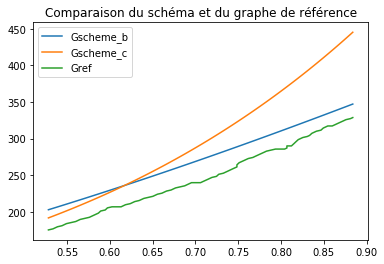

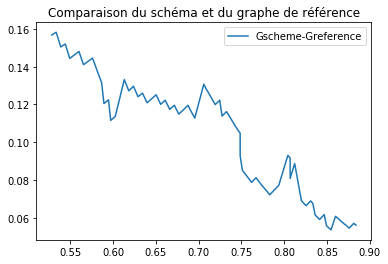

In [6]:
Fref =  [0.5282, 0.5335, 0.5388, 0.5441, 0.5493, 0.5547, 0.5601, 0.5654, 0.5707, 0.576, 0.5813, 0.5866, 0.5893, 0.5946, 0.5972, 0.6025, 0.6078, 0.6131, 0.6183, 0.6238, 0.6291, 0.6343, 0.6397, 0.645, 0.6503, 0.6556, 0.6609, 0.6662, 0.6715, 0.6768, 0.6821, 0.6875, 0.6901, 0.6954, 0.7006, 0.706, 0.7086, 0.714, 0.7193, 0.7246, 0.7273, 0.7326, 0.7379, 0.7431, 0.7485, 0.7485, 0.7511, 0.7565, 0.7618, 0.7671, 0.7697, 0.775, 0.7804, 0.783, 0.7883, 0.7936, 0.7989, 0.8042, 0.8069, 0.8069, 0.8122, 0.8149, 0.8175, 0.8202, 0.8255, 0.8308, 0.8334, 0.8361, 0.8414, 0.8467, 0.8494, 0.8547, 0.8599, 0.8626, 0.8679, 0.8733, 0.8759, 0.8812, 0.8839]
Eref =  [175.4379, 176.8697, 179.7351, 181.167, 184.0325, 185.4642, 186.896, 189.7614, 191.1933, 192.6251, 195.4906, 198.3561, 201.2225, 202.6543, 205.5207, 206.9525, 206.9506, 206.9487, 209.8142, 211.246, 214.1114, 215.5432, 218.4087, 219.8405, 221.2723, 224.1378, 225.5695, 228.435, 229.8668, 232.7323, 234.1641, 235.5958, 237.0286, 239.8941, 239.8921, 239.8902, 241.323, 244.1885, 247.054, 248.4858, 251.3522, 252.784, 255.6495, 258.515, 261.3805, 264.2478, 267.1143, 269.9798, 272.8452, 274.277, 275.7098, 278.5753, 281.4407, 282.8735, 284.3053, 285.737, 285.7351, 285.7332, 287.166, 290.0334, 290.0315, 292.8979, 295.7643, 298.6308, 301.4962, 302.928, 304.3608, 307.2272, 310.0927, 311.5245, 314.3909, 317.2564, 317.2545, 318.6872, 321.5527, 324.4182, 325.8509, 327.2827, 328.7155]

Em=69
Ef=400
num=0.345
nuc=0.25

Cm=complete_behavior({'E':Em,'nu':num})
Cf=complete_behavior({'E':Ef,'nu':nuf})
Km,Gm=Cm['K'],Cm['G']
Kf,Gf=Cf['K'],Cf['G']

Ecalc=[]
Ecalc2=[]
for i in range(len(Fref2)):
    
    f_inclusion = Fref[i]
    inclusion_behavior = {"K":Kf, "G":Gf}
    matrix_behavior = {"K":Km, "G":Gm}     
    inclusion1 = Inclusion(0,inclusion_behavior)
    microstructure1 = Microstructure(matrix_behavior,{inclusion1 : f_inclusion})
    
    Ch1=Autocoherent_IIb().compute_h_behavior(microstructure1)  
    Ecalc.append(Ch1['E'])
    Ch2=Autocoherent_IIc().compute_h_behavior(microstructure1)  
    Ecalc2.append(Ch2['E'])
    

plt.title("Comparaison du schéma et du graphe de référence")
plt.plot(Fref,Ecalc,label='Gscheme_b')
plt.plot(Fref,Ecalc2,label='Gscheme_c')
plt.plot(Fref,Eref,label='Gref')
plt.legend()
plt.show()

Ediff = (np.array(Ecalc)-np.array(Eref))/np.array(Eref)
plt.plot(Fref,Ediff,label='Gscheme-Greference')
plt.legend()
plt.title("Comparaison du schéma et du graphe de référence")
plt.show()

# Test Modèle autocohérent généralisé

### Test pour un composite particulier

Référence :  [Christensen R.M., and Lo K.H.,  1979. SOLUTIONS FOR EFFECTIVE SHEAR PROPERTIES IN THREE PHASE SPHERE AND CYLINDER MODELS].

Fig 3 p12


273 273


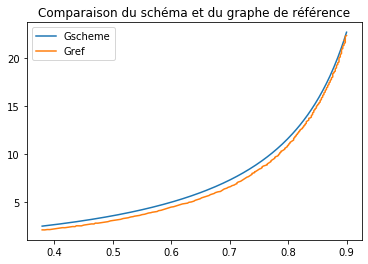

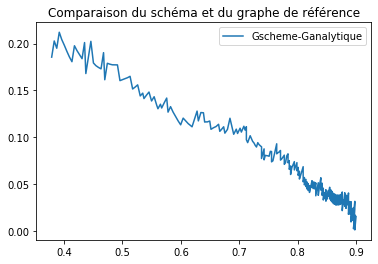

In [7]:
Fref =  [0.3789, 0.3833, 0.3876, 0.3919, 0.3961, 0.4006, 0.4049, 0.4092, 0.4136, 0.4179, 0.4222, 0.4266, 0.4309, 0.4352, 0.4374, 0.4417, 0.446, 0.4504, 0.4546, 0.459, 0.4634, 0.4677, 0.4698, 0.4742, 0.4785, 0.4828, 0.4872, 0.4915, 0.4958, 0.5002, 0.5045, 0.5088, 0.5131, 0.5175, 0.5218, 0.5261, 0.5305, 0.5348, 0.5369, 0.5413, 0.5455, 0.5499, 0.5543, 0.5586, 0.5608, 0.5651, 0.5672, 0.5716, 0.5758, 0.5781, 0.5824, 0.5867, 0.5911, 0.5954, 0.5997, 0.604, 0.6084, 0.6127, 0.6149, 0.6192, 0.6235, 0.6278, 0.63, 0.6343, 0.6387, 0.6408, 0.643, 0.6451, 0.6473, 0.6495, 0.6516, 0.656, 0.6581, 0.6602, 0.6646, 0.6667, 0.6689, 0.6733, 0.6754, 0.6798, 0.6841, 0.6863, 0.6884, 0.6905, 0.6949, 0.6971, 0.7014, 0.7036, 0.7079, 0.71, 0.7122, 0.7122, 0.7144, 0.7187, 0.7208, 0.7229, 0.7252, 0.7273, 0.7295, 0.7317, 0.7338, 0.736, 0.7382, 0.7381, 0.7425, 0.7425, 0.7446, 0.7468, 0.749, 0.7511, 0.7532, 0.7553, 0.7553, 0.7576, 0.7619, 0.7641, 0.7641, 0.7663, 0.7684, 0.7706, 0.7706, 0.7727, 0.7749, 0.7771, 0.7771, 0.7792, 0.7814, 0.7835, 0.7835, 0.7856, 0.7856, 0.7879, 0.7879, 0.79, 0.7922, 0.7943, 0.7943, 0.7965, 0.7987, 0.7987, 0.8008, 0.8008, 0.803, 0.803, 0.8051, 0.8073, 0.8094, 0.8094, 0.8094, 0.8115, 0.8115, 0.8138, 0.8138, 0.8159, 0.8159, 0.8181, 0.8181, 0.8202, 0.8202, 0.8224, 0.8246, 0.8246, 0.8267, 0.8267, 0.8289, 0.8289, 0.831, 0.831, 0.831, 0.8332, 0.8353, 0.8353, 0.8353, 0.8375, 0.8397, 0.8397, 0.8397, 0.8418, 0.8418, 0.8418, 0.8439, 0.8439, 0.8439, 0.846, 0.846, 0.8483, 0.8483, 0.8483, 0.8504, 0.8504, 0.8526, 0.8526, 0.8548, 0.8547, 0.8547, 0.8569, 0.8569, 0.8569, 0.8591, 0.8591, 0.8591, 0.8612, 0.8612, 0.8612, 0.8634, 0.8634, 0.8634, 0.8655, 0.8655, 0.8655, 0.8677, 0.8677, 0.8677, 0.8698, 0.8698, 0.8698, 0.8719, 0.8719, 0.8719, 0.874, 0.874, 0.874, 0.8763, 0.8763, 0.8763, 0.8763, 0.8763, 0.8784, 0.8784, 0.8806, 0.8806, 0.8806, 0.8806, 0.8827, 0.8827, 0.8827, 0.8827, 0.8849, 0.8849, 0.8849, 0.887, 0.887, 0.887, 0.887, 0.887, 0.887, 0.8892, 0.8892, 0.8892, 0.8892, 0.8913, 0.8913, 0.8913, 0.8913, 0.8913, 0.8913, 0.8935, 0.8935, 0.8935, 0.8935, 0.8956, 0.8956, 0.8956, 0.8978, 0.8978, 0.8978, 0.8956, 0.8978, 0.8978, 0.8978, 0.8978, 0.8978, 0.8999]
Gref =  [2.1007, 2.0965, 2.136, 2.1319, 2.1715, 2.2111, 2.2507, 2.2903, 2.3299, 2.3258, 2.3654, 2.405, 2.4445, 2.4404, 2.5259, 2.5217, 2.5175, 2.6009, 2.6404, 2.6801, 2.7197, 2.7156, 2.8011, 2.7969, 2.8365, 2.8761, 2.9157, 2.9553, 3.0387, 3.0783, 3.1179, 3.1575, 3.1971, 3.2805, 3.3202, 3.3598, 3.4432, 3.4828, 3.5245, 3.5641, 3.6037, 3.6871, 3.7267, 3.8101, 3.8518, 3.8914, 3.9331, 3.9727, 4.0124, 4.0979, 4.1375, 4.2209, 4.3043, 4.3877, 4.4711, 4.5107, 4.5941, 4.6775, 4.7191, 4.8026, 4.8422, 4.8818, 4.9673, 5.0069, 5.0903, 5.1758, 5.2176, 5.2593, 5.301, 5.3427, 5.4282, 5.5116, 5.5533, 5.595, 5.6784, 5.7639, 5.8056, 5.889, 5.9745, 6.0579, 6.0975, 6.183, 6.2685, 6.354, 6.4374, 6.5229, 6.6063, 6.6918, 6.7752, 6.8607, 6.9024, 6.99, 7.0755, 7.1589, 7.2444, 7.3299, 7.4154, 7.5009, 7.5864, 7.628, 7.7136, 7.7991, 7.8846, 7.9722, 8.0556, 8.1432, 8.1849, 8.2704, 8.3559, 8.4414, 8.483, 8.5686, 8.6562, 8.7417, 8.8251, 8.8668, 8.9544, 9.0399, 9.1254, 9.2109, 9.2985, 9.384, 9.4695, 9.555, 9.6425, 9.7281, 9.7698, 9.8553, 9.9428, 10.0284, 10.116, 10.2015, 10.2891, 10.3308, 10.4163, 10.5018, 10.5894, 10.6749, 10.7604, 10.8479, 10.9335, 11.0211, 11.1066, 11.1942, 11.2797, 11.3652, 11.4506, 11.5383, 11.6259, 11.7114, 11.799, 11.8845, 11.9721, 12.0576, 12.1452, 12.2307, 12.3183, 12.4038, 12.4914, 12.5769, 12.6623, 12.75, 12.8355, 12.9231, 13.0086, 13.0962, 13.1817, 13.2692, 13.3569, 13.4424, 13.5279, 13.6155, 13.7029, 13.7448, 13.8303, 13.9178, 14.0054, 14.0909, 14.1785, 14.2661, 14.3516, 14.4392, 14.5268, 14.6122, 14.6999, 14.7854, 14.873, 14.9606, 15.0461, 15.1337, 15.2192, 15.3068, 15.3923, 15.4799, 15.5675, 15.653, 15.7406, 15.8282, 15.9137, 16.0013, 16.0889, 16.1743, 16.262, 16.3496, 16.4351, 16.5227, 16.6103, 16.6958, 16.7833, 16.8709, 16.9564, 17.044, 17.1316, 17.2171, 17.3047, 17.3923, 17.4778, 17.5654, 17.653, 17.7385, 17.826, 17.9137, 17.9992, 18.0868, 18.1743, 18.262, 18.3496, 18.4351, 18.5227, 18.6082, 18.6958, 18.7833, 18.871, 18.9565, 19.0441, 19.1317, 19.2193, 19.3048, 19.3924, 19.4799, 19.5654, 19.653, 19.7406, 19.8282, 19.9158, 20.0034, 20.0889, 20.1764, 20.2641, 20.3517, 20.4372, 20.5248, 20.6124, 20.7, 20.7875, 20.8752, 20.9607, 21.0483, 21.1359, 21.2235, 21.309, 21.3966, 21.4842, 21.5697, 21.6573, 21.7448, 21.7907, 21.8761, 21.9638, 22.0514, 22.139, 22.2266, 22.3121]

Gm = 1
num = 0.35
Km = Gm*(2+2*num)/(3-6*num)

Gi = 135.14*Gm
nui = 0.2
Ki = Gi*(2+2*nui)/(3-6*nui)

inclusion_behavior = {"K":Ki, "G":Gi}           
matrix_behavior={"K":Km, "G":Gm}
inclusion1 = Inclusion(0,inclusion_behavior)

Gcalc=[]
for i in range(len(Fref)):
    
    f_inclusion = Fref[i]
    microstructure1 = Microstructure(matrix_behavior,{inclusion1 : f_inclusion})
    model=Autocoherent_III()
    Ch=model.compute_h_behavior(microstructure1)    
    Gcalc.append(Ch['G']/Gm)
    
print(len(Gcalc),len(Gref))
plt.title("Comparaison du schéma et du graphe de référence")
plt.plot(Fref,Gcalc,label='Gscheme')
plt.plot(Fref,Gref,label='Gref')
plt.legend()
plt.show()

Gdiff = (np.array(Gcalc)-np.array(Gref))/np.array(Gref)
plt.plot(Fref,Gdiff,label='Gscheme-Ganalytique')
plt.legend()
plt.title("Comparaison du schéma et du graphe de référence")
plt.show()

### Test pour un composite particulier

Référence :  [Christensen R.M., and Lo K.H.,  1979. SOLUTIONS FOR EFFECTIVE SHEAR PROPERTIES IN THREE PHASE SPHERE AND CYLINDER MODELS].

Fig 4 p12

237 237


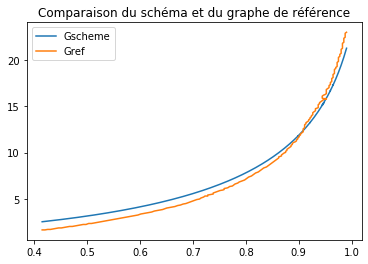

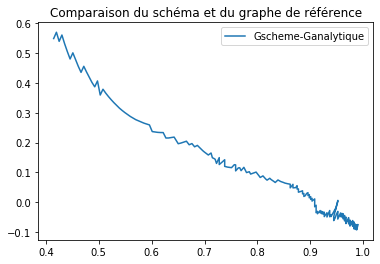

In [10]:
Fref =  [0.4146, 0.4198, 0.425, 0.4302, 0.4353, 0.4405, 0.4457, 0.4509, 0.4561, 0.4612, 0.4664, 0.4716, 0.4768, 0.482, 0.487, 0.4923, 0.4975, 0.5027, 0.5079, 0.513, 0.5182, 0.5234, 0.5286, 0.5338, 0.5389, 0.5441, 0.5493, 0.5545, 0.5596, 0.5648, 0.5699, 0.5752, 0.5804, 0.5855, 0.5907, 0.5958, 0.6011, 0.6063, 0.6114, 0.6166, 0.6218, 0.627, 0.632, 0.6373, 0.6425, 0.6477, 0.6503, 0.6554, 0.6606, 0.6658, 0.671, 0.6762, 0.6813, 0.6865, 0.6917, 0.6968, 0.6994, 0.7046, 0.7072, 0.7124, 0.7149, 0.7176, 0.7201, 0.7227, 0.7279, 0.7279, 0.733, 0.7382, 0.7382, 0.7433, 0.7486, 0.7511, 0.7564, 0.7589, 0.7589, 0.7641, 0.7667, 0.7692, 0.7745, 0.777, 0.7795, 0.7848, 0.7873, 0.7925, 0.7976, 0.8003, 0.8029, 0.8054, 0.8106, 0.8132, 0.8157, 0.8184, 0.8235, 0.826, 0.8287, 0.8313, 0.8338, 0.839, 0.8416, 0.8441, 0.8468, 0.8494, 0.8519, 0.8545, 0.8571, 0.8597, 0.8622, 0.8622, 0.8674, 0.8674, 0.87, 0.8726, 0.8752, 0.8752, 0.8777, 0.8777, 0.8803, 0.8829, 0.8855, 0.8855, 0.888, 0.888, 0.8906, 0.8932, 0.8958, 0.8958, 0.8984, 0.8982, 0.9009, 0.9009, 0.9035, 0.9035, 0.9061, 0.9085, 0.9085, 0.9085, 0.9085, 0.9112, 0.9112, 0.9112, 0.9112, 0.9137, 0.9137, 0.9163, 0.9189, 0.9189, 0.9215, 0.9214, 0.924, 0.924, 0.9266, 0.9266, 0.9266, 0.9292, 0.9317, 0.9317, 0.9317, 0.9369, 0.9369, 0.9369, 0.9369, 0.9394, 0.9394, 0.942, 0.9445, 0.9472, 0.9472, 0.9523, 0.9523, 0.9472, 0.9445, 0.9445, 0.9445, 0.9471, 0.9497, 0.9523, 0.9523, 0.9523, 0.9523, 0.9522, 0.9548, 0.9574, 0.9574, 0.9574, 0.96, 0.9599, 0.9599, 0.9625, 0.9625, 0.9625, 0.9625, 0.9651, 0.9651, 0.9649, 0.9649, 0.9676, 0.9676, 0.9676, 0.9676, 0.9676, 0.9701, 0.9701, 0.9727, 0.9727, 0.9727, 0.9727, 0.9727, 0.9752, 0.9752, 0.9752, 0.9752, 0.9752, 0.9778, 0.9778, 0.9778, 0.9803, 0.9803, 0.9803, 0.9803, 0.9803, 0.9828, 0.9828, 0.9828, 0.9828, 0.9828, 0.9828, 0.9854, 0.9854, 0.9854, 0.9854, 0.9854, 0.9879, 0.9879, 0.9879, 0.9879, 0.9879, 0.9905]
Gref =  [1.6139, 1.6133, 1.6672, 1.6665, 1.7206, 1.7745, 1.8284, 1.8277, 1.8818, 1.9357, 1.9897, 1.9889, 2.043, 2.0969, 2.1509, 2.2048, 2.2042, 2.3127, 2.3121, 2.366, 2.42, 2.4739, 2.5279, 2.5817, 2.6358, 2.6897, 2.7437, 2.7976, 2.8516, 2.9055, 2.9595, 3.0134, 3.0674, 3.1213, 3.1753, 3.2292, 3.3377, 3.3917, 3.4456, 3.4996, 3.5535, 3.6621, 3.716, 3.77, 3.8239, 3.9325, 3.9867, 4.0407, 4.0946, 4.1486, 4.257, 4.3111, 4.4196, 4.4735, 4.5821, 4.6905, 4.7449, 4.8534, 4.9077, 4.9616, 5.0705, 5.1248, 5.179, 5.2879, 5.2872, 5.3963, 5.4504, 5.5043, 5.6135, 5.722, 5.8306, 5.8848, 5.9388, 5.9929, 6.1022, 6.1562, 6.2104, 6.3193, 6.3732, 6.4821, 6.5909, 6.6995, 6.8083, 6.9169, 7.0254, 7.1342, 7.2431, 7.3519, 7.4605, 7.5693, 7.6782, 7.787, 7.8956, 8.0044, 8.1133, 8.2221, 8.331, 8.4395, 8.5484, 8.6572, 8.7661, 8.8749, 8.9838, 9.0926, 9.2015, 9.3104, 9.4192, 9.5284, 9.6369, 9.7461, 9.8549, 9.9638, 10.0181, 10.1272, 10.2361, 10.3453, 10.4541, 10.563, 10.6718, 10.781, 10.8898, 10.999, 11.1078, 11.1621, 11.271, 11.3801, 11.4889, 11.5981, 11.7069, 11.8162, 11.9251, 12.0342, 12.1431, 12.2519, 12.3611, 12.4703, 12.5795, 12.6883, 12.7974, 12.9066, 13.0158, 13.1247, 13.2338, 13.3427, 13.4516, 13.5607, 13.6696, 13.7788, 13.8876, 13.9968, 14.1056, 14.2147, 14.324, 14.4328, 14.5417, 14.6509, 14.76, 14.8686, 14.9777, 15.0869, 15.1961, 15.3049, 15.4141, 15.523, 15.6318, 15.7407, 15.8498, 15.8492, 15.7946, 15.8498, 15.9047, 16.0139, 16.1231, 16.2319, 16.2862, 16.3951, 16.5042, 16.6134, 16.7226, 16.8317, 16.9405, 17.0493, 17.1586, 17.2678, 17.3766, 17.4858, 17.595, 17.7038, 17.813, 17.9222, 18.0314, 18.1402, 18.2494, 18.3586, 18.4677, 18.5766, 18.6857, 18.7949, 18.9041, 19.0133, 19.1221, 19.2313, 19.3401, 19.4493, 19.5585, 19.6677, 19.7768, 19.8857, 19.9949, 20.104, 20.2132, 20.3224, 20.4312, 20.5404, 20.6496, 20.7584, 20.8676, 20.9768, 21.0859, 21.1951, 21.304, 21.4131, 21.5223, 21.6315, 21.7406, 21.8498, 21.9586, 22.0678, 22.177, 22.2862, 22.3954, 22.5042, 22.6134, 22.7226, 22.8317, 22.9409, 23.0497]

Gm = 1
num = 0.35
Km = Gm*(2+2*num)/(3-6*num)

Gi = 23.46*Gm
nui = 0.22
Ki = Gi*(2+2*nui)/(3-6*nui)

inclusion_behavior = {"K":Ki, "G":Gi}           
matrix_behavior={"K":Km, "G":Gm}
inclusion1 = Inclusion(0,inclusion_behavior)

Gcalc=[]
for i in range(len(Fref)):
    
    f_inclusion = Fref[i]
    microstructure1 = Microstructure(matrix_behavior,{inclusion1 : f_inclusion})
    model=Autocoherent_III()
    Ch=model.compute_h_behavior(microstructure1)    
    Gcalc.append(Ch['G']/Gm)
    
print(len(Gcalc),len(Gref))
plt.title("Comparaison du schéma et du graphe de référence")
plt.plot(Fref,Gcalc,label='Gscheme')
plt.plot(Fref,Gref,label='Gref')
plt.legend()
plt.show()

Gdiff = (np.array(Gcalc)-np.array(Gref))/np.array(Gref)
plt.plot(Fref,Gdiff,label='Gscheme-Ganalytique')
plt.legend()
plt.title("Comparaison du schéma et du graphe de référence")
plt.show()

### 3 phases cas poreux 

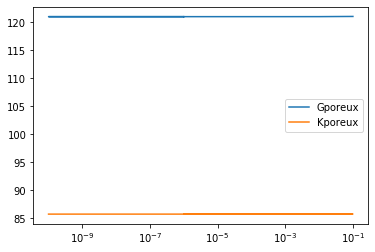

In [11]:
LK=[]
LG=[]
Nu=[]
LKF=[]
LGF=[]
R3=10
f_inclusion = 0.1
R1=f_inclusion**(1/3)*R3
e=0.1*R1
Kf=10**-6
for i in range(10):
    Gf=10**(-1-i)
    nuf = (3*Kf-2*Gf)/(6*Kf+2*Gf)
    
    inclusion_behavior = {"K":Kf, "G":Gf}           
    matrix_behavior={"K":100, "G":150} 
          
    inclusion = Inclusion(0,inclusion_behavior)
    microstructure = Microstructure(matrix_behavior,{inclusion : f_inclusion})
    model = Autocoherent_III()
    Ch=model.compute_h_behavior(microstructure)
    
    LG.append(Ch['G'])
    LK.append(Ch['K'])
    LGF.append(Gf)
    LKF.append(Kf)
    Nu.append(nuf)
    
Gf=10**-6
for i in range(10):
    Kf=10**(-1-i)
    nuf = (3*Kf-2*Gf)/(6*Kf+2*Gf)
    
    inclusion_behavior = {"K":Kf, "G":Gf}           
    matrix_behavior={"K":100, "G":150} 
          
    inclusion = Inclusion(0,inclusion_behavior)
    microstructure = Microstructure(matrix_behavior,{inclusion : f_inclusion})
    model = Autocoherent_III()
    Ch=model.compute_h_behavior(microstructure)

    
    LG.append(Ch['G'])
    LK.append(Ch['K'])
    LGF.append(Gf)
    LKF.append(Kf)
    Nu.append(nuf)


plt.plot(LGF,LG,label='Gporeux')
plt.plot(LKF,LK,label='Kporeux')
plt.xscale('log')
plt.legend()
#plt.plot(Nu,LK)
plt.show()

### 3 phases concentration élévées (f->1) et matrice compressible

Référence :  [Christensen,  R.M.,  1990.  A critical evaluation for a class of micromechanics models].

Equation (44) p12

Remarque : il y a un équilibre entre nu->0.5 et f->1

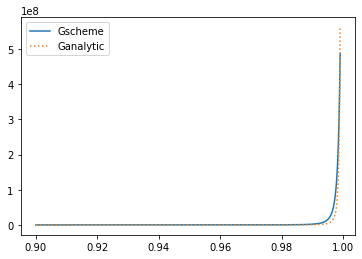

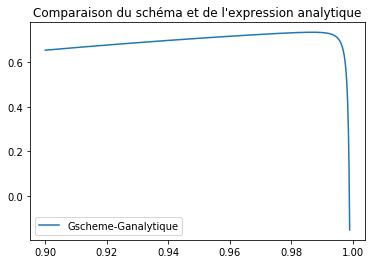

In [12]:
F=np.linspace(0.9,0.999,1000)
LG=[]
LGT=[]

for i in range(len(F)):
    f=F[i]
    Em=1
    mum=0.4999999
    Km=Em/(3-6*mum)
    Gm=Em/(2+2*mum)
    
    E=10**15
    mu=0.3
    K=E/(3-6*mu)
    G=E/(2+2*mu)
    
    matrix_behavior={"K":Km, "G":Gm}  
    inclusion_behavior = {"K":K, "G":G}
    
    inclusion = Inclusion(0,inclusion_behavior)
    microstructure = Microstructure(matrix_behavior,{inclusion : f})
    model = Autocoherent_III()
    
    Ch=model.compute_h_behavior(microstructure)
    LG.append(Ch['G'])
    LGT.append(Gm*27/16/(1-f)**3)
    
plt.plot(F,LG,label='Gscheme')
plt.plot(F,LGT,':',label='Ganalytic')
plt.legend()
plt.show()

Gdiff = (np.array(LG)-np.array(LGT))/np.array(LG)
plt.plot(F,Gdiff,label='Gscheme-Ganalytique')
plt.legend()
plt.title("Comparaison du schéma et de l'expression analytique")
plt.show()

# Test Modèle autocohérent 4-Phases

### Influence de l'épaisseur de l'interphase

Référence :  [Lipsinki P., Cherkaoui M., 2007. Four Phase Model: A New Formulation to Predict the Effective Elastic Moduli of Composites]

Datas : Fig 3a and 3b p5

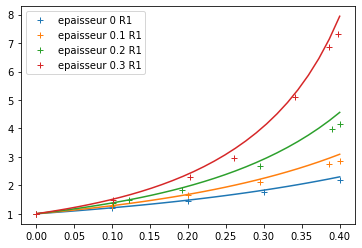

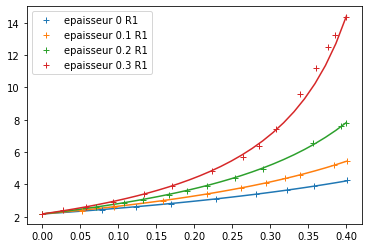

In [13]:
#Données

FG1 = [-0.000460829, 0.1, 0.200307373, 0.299846544, 0.400614286]
G1 = [0.994818184, 1.198303722, 1.452660644, 1.772958185, 2.191234013]
FG2 = [-0.000460829,0.100038249, 0.200768203, 0.294777419, 0.386175115, 0.399884793]
G2 = [0.994818184, 1.267070529, 1.648605912, 2.106448372, 2.752707135, 2.865754656]
FG3 = [-0.000460829,0.100921659, 0.122177419, 0.192396313, 0.294892627, 0.38968894, 0.400288018]
G3 = [0.994818184, 1.366461909, 1.471030866, 1.851153155, 2.667921494, 3.979272737, 4.144604736]
FG4 = [-0.000460829,0.101382488, 0.203341014, 0.260195853, 0.341167281, 0.385541475, 0.398003226]
G4 = [0.994818184, 1.497879652, 2.296277769, 2.963258143, 5.098443194, 6.871876179, 7.333019626]

FK1 =  [0.0, 0.0791157649796393, 0.123327515997673, 0.169245840605003, 0.228504944735311, 0.28109365910413, 0.321582315299593, 0.357417102966841, 0.400232693426411]
K1 =  [2.17666060490046, 2.41991290199081, 2.59738705972435, 2.80675727411945, 3.11782159264931, 3.39698985451761, 3.65220616385911, 3.90744640122511, 4.24243874425727]
FK2 =  [0.400232693426411, 0.383246073298429, 0.339034322280396, 0.319720767888307, 0.29412449098313, 0.261314717859221, 0.216637579988365, 0.159162303664921, 0.0945898778359511, 0.0526664339732403, 0.0]
K2 =  [5.45080398162328, 5.2115237366003, 4.60135911179173, 4.37404287901991, 4.07494257274119, 3.78780627871363, 3.41692189892802, 2.96228943338438, 2.6093510719755, 2.38004881316998, 2.17666060490046]
FK3 =  [0.399941826643397, 0.39325189063409, 0.355613728912158, 0.289781035485748, 0.254101221640489, 0.216094473531123, 0.190188248981966, 0.166918906340896, 0.13216986620128, 0.107038976148924, 0.0711264688772542, 0.0]
K3 =  [7.80472339203675, 7.6312452143951, 6.57542113323124, 4.97623947166922, 4.40993491577335, 3.91541443338438, 3.59638208269525, 3.35710183767228, 3.04603751914242, 2.85461332312404, 2.60336906584992, 2.17666060490046]
FK4 =  [0.399185573007563, 0.385573007562536, 0.376381617219314, 0.36005445026178, 0.339421989528796, 0.307310296684119, 0.285398487492728, 0.26418475858057, 0.222920302501454, 0.170331588132635, 0.134186387434555, 0.0934264107038976, 0.0571262361838278, 0.0273028504944735, 0.0]
K4 =  [14.3281010719755, 13.2453579632466, 12.5215352220521, 11.213461906585, 9.58635624042879, 7.42486600306279, 6.37203292496171, 5.7020482388974, 4.8167113323124, 3.86755838437978, 3.39698985451761, 2.92639739663093, 2.6093510719755, 2.39201282542113, 2.17666060490046]

Alpha=[0,0.1,0.2,0.3]
F=np.linspace(0.001,0.4,30)
LG=[[],[],[],[]]
LK=[[],[],[],[]]
for j in range(len(Alpha)):
    for i in range(len(F)):
        Gi,Gv,Gm=20,10,1
        nu=0.3
        Ki=2*Gi*(nu+1)/(3-6*nu)
        Kv=2*Gv*(nu+1)/(3-6*nu)
        Km=2*Gm*(nu+1)/(3-6*nu)
        
        f_inclusion = F[i]
        e = Alpha[j]
        f_interphase = f_inclusion*((1+e)**3-1)
        
        inclusion_behavior={"K":Ki, "G":Gi}
        interphase_behavior={"K":Kv, "G":Gv}
        matrix_behavior={"K":Km, "G":Gm}
          
        inclusion = Inclusion(0,inclusion_behavior)
        interphase = Inclusion(0,interphase_behavior)
        microstructure = Microstructure(matrix_behavior,{inclusion : f_inclusion,interphase : f_interphase})

        model = Autocoherent_IV()        
        Ch=model.compute_h_behavior(microstructure)
        
        LK[j].append(Ch['K'])
        LG[j].append(Ch['G'])


for i in range(len(LG)) : 
    plt.plot(F,LG[i])        

plt.plot(FG1,G1,'+C0',label="epaisseur 0 R1")
plt.plot(FG2,G2,'+C1',label="epaisseur 0.1 R1")
plt.plot(FG3,G3,'+C2',label="epaisseur 0.2 R1")
plt.plot(FG4,G4,'+C3',label="epaisseur 0.3 R1")
plt.legend()

plt.show()

for i in range(len(LK)) : 
    plt.plot(F,LK[i])        

plt.plot(FK1,K1,'+C0',label="epaisseur 0 R1")
plt.plot(FK2,K2,'+C1',label="epaisseur 0.1 R1")
plt.plot(FK3,K3,'+C2',label="epaisseur 0.2 R1")
plt.plot(FK4,K4,'+C3',label="epaisseur 0.3 R1")
plt.legend()
plt.show()
